In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
sns.pairplot(df)

In [62]:
space=df['sqft_living']
price=df['price']

x = np.array(space).reshape(-1, 1)
y = np.array(price)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=0)
regression =LinearRegression()

In [65]:
regression.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
pred= regression.predict(xtest)

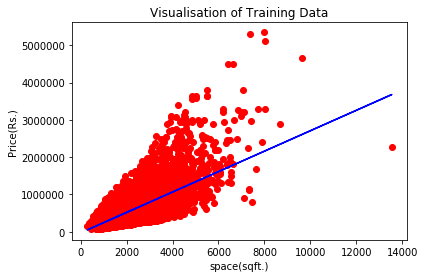

In [67]:
#visulisation of training data
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,regression.predict(xtrain),color='blue')
plt.title("Visualisation of Training Data")
plt.xlabel("space(sqft.)")
plt.ylabel("Price(Rs.)")
plt.show()

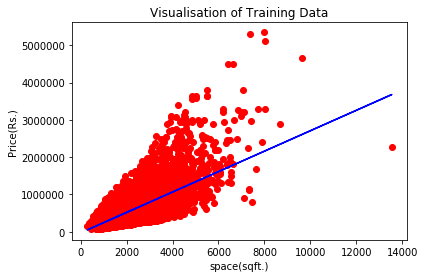

In [68]:
#visualisation of Training Data
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,regression.predict(xtrain),color='blue')
plt.title("Visualisation of Training Data")
plt.xlabel("space(sqft.)")
plt.ylabel("Price(Rs.)")
plt.show()

In [69]:
r2_score(ytest,pred)

0.5000063123558641

The Analysed model is  50 % Accurate

# Analysing House Prediction Without using sklearn Library 

In [70]:
xmean = np.mean(xtrain)
ymean = np.mean(ytrain)
n= len(xtrain)

num=0
deno=0
for i in range(n):
    num=num+(xtrain[i]-xmean)*(ytrain[i]-ymean)
    deno= deno+(xtrain[i]-xmean)**2
    
# y= mx+c
m=num/deno
c= ymean - m*xmean
print(m,c)

[273.80181792] [-29039.69073405]


In [71]:
def prediction(x,m,c):
    return m*x+c

In [73]:
#calulating r^2
ssr=0
sst=0
for i in range(n):
    y_pred1 = c + m * xtrain[i]
    sst += (ytrain[i] - ymean) ** 2
    ssr += (ytrain[i] - y_pred1) ** 2
    
r2 = 1 - (ssr/sst)
print(r2)

[0.48842625]


Without sklearn the model is 48 % accurate